
**Nama : Ivan Zuhri Ramadhani Syahrial**

**NIM : 24/540342/PA/22939**

**Kelas : KOM**

# Pengolahan Citra Digital - Assignment 1

Pada assignment ini, saya akan melakukan eksperimen dengan teknik downsampling dan upsampling pada gambar digital.

## Downsampling

Downsampling adalah proses mengurangi ukuran (resolusi) sebuah gambar. Dalam praktikum ini, kita menggunakan tiga metode downsampling:

1. Max Pooling: Mengambil nilai piksel tertinggi dalam setiap blok
2. Average Pooling: Mengambil nilai rata-rata dari semua piksel dalam blok
3. Median Pooling: Mengambil nilai median dari semua piksel dalam blok

Metode-metode ini memiliki karakteristik yang berbeda dan cocok untuk aplikasi yang berbeda pula.

## Upsampling

Upsampling adalah proses meningkatkan ukuran (resolusi) gambar. Karena kita menambahkan informasi baru yang tidak ada dalam gambar asli, kita perlu menggunakan teknik interpolasi untuk "menebak" nilai-nilai piksel yang baru.

Kita menggunakan tiga metode upsampling:

1. Nearest Neighbor: Metode paling sederhana yang hanya menyalin nilai piksel terdekat
2. Bilinear Interpolation: Menggunakan rata-rata tertimbang dari 4 piksel terdekat
3. Bicubic Interpolation: Menggunakan interpolasi yang lebih kompleks dengan 16 piksel terdekat untuk hasil yang lebih halus

Saving 2.webp to 2 (2).webp
Ukuran Gambar Asli: (521, 800)


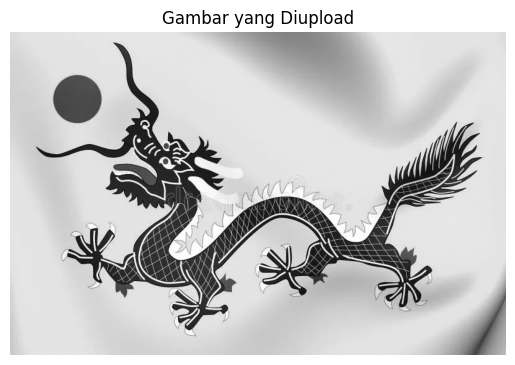

Hasil Downsampling:


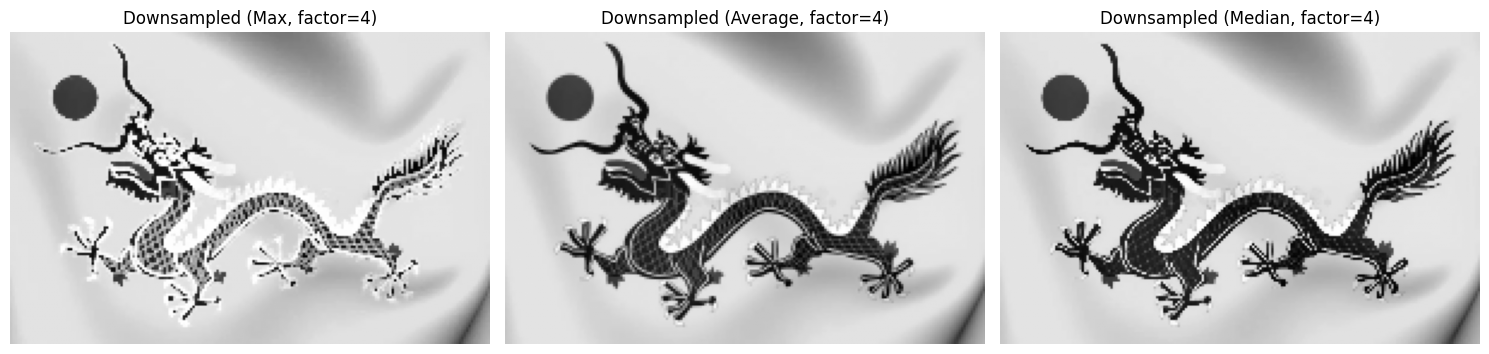

Hasil Upsampling:


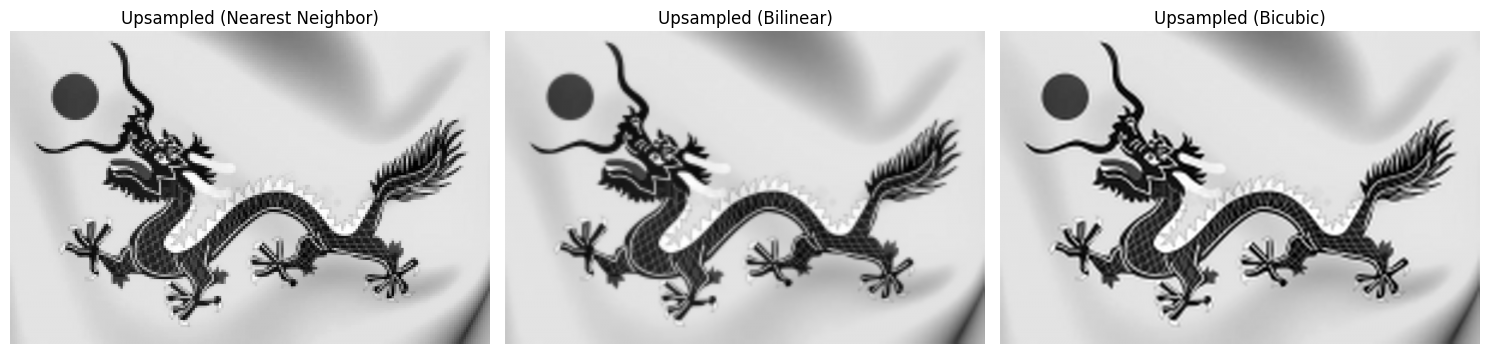

In [3]:
import cv2  # OpenCV untuk pengolahan gambar
import numpy as np  # NumPy untuk komputasi numerik
from PIL import Image  # PIL untuk memproses gambar
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi
from skimage.transform import resize  # Scikit-image untuk mengubah ukuran gambar
from google.colab import files  # Untuk mengupload file di Google Colab
from io import BytesIO  # Untuk menangani data byte

# Fungsi untuk menampilkan beberapa gambar dalam grid
def plot_images(images, titles, figsize=(15, 10)):
    n = len(images)  # Jumlah gambar yang akan ditampilkan
    # Menghitung jumlah baris yang dibutuhkan untuk 3 kolom
    n_rows = (n + 2) // 3  # Pembagian bulat ke atas
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize)  # Membuat grid dengan n_rows baris dan 3 kolom

    # Mengubah array axes menjadi flat untuk memudahkan looping
    axes = axes.ravel()

    for i in range(n):  # Loop hanya untuk jumlah gambar yang kita miliki
        axes[i].imshow(images[i], cmap='gray')  # Menampilkan gambar dengan colormap abu-abu
        axes[i].set_title(titles[i])  # Menambahkan judul untuk setiap gambar
        axes[i].axis('off')  # Mematikan sumbu koordinat

    # Mematikan axes yang tidak digunakan dalam grid
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Mengatur tata letak agar tidak overlapping
    plt.show()  # Menampilkan plot

# Memuat gambar dengan metode upload
uploaded = files.upload()

# Mendapatkan nama file dari gambar yang diupload
file_name = next(iter(uploaded))

# Membuka gambar menggunakan PIL dan mengonversinya ke array numpy
pil_image = Image.open(BytesIO(uploaded[file_name]))
original_image = np.array(pil_image.convert('L'))  # '.convert('L')' mengonversi ke grayscale

print("Ukuran Gambar Asli:", original_image.shape)  # Menampilkan dimensi gambar
plt.imshow(original_image, cmap='gray')  # Menampilkan gambar asli
plt.title('Gambar yang Diupload')  # Judul untuk gambar
plt.axis('off')  # Mematikan sumbu koordinat
plt.show()  # Menampilkan gambar

# Downsampling menggunakan Max Pooling
def downsample_max(image, factor):
    h, w = image.shape  # Mendapatkan tinggi dan lebar gambar
    new_h, new_w = h // factor, w // factor  # Menghitung dimensi baru setelah downsampling
    downsampled = np.zeros((new_h, new_w))  # Membuat array kosong untuk gambar hasil
    for i in range(new_h):
        for j in range(new_w):
            # Mengambil patch/potongan gambar sesuai faktor
            patch = image[i*factor:(i+1)*factor, j*factor:(j+1)*factor]
            downsampled[i, j] = np.max(patch)  # Mengambil nilai maksimum dari patch
    return downsampled

# Downsampling menggunakan Average Pooling
def downsample_avg(image, factor):
    h, w = image.shape
    new_h, new_w = h // factor, w // factor
    downsampled = np.zeros((new_h, new_w))
    for i in range(new_h):
        for j in range(new_w):
            patch = image[i*factor:(i+1)*factor, j*factor:(j+1)*factor]
            downsampled[i, j] = np.mean(patch)  # Mengambil nilai rata-rata dari patch
    return downsampled

# Downsampling menggunakan Median Pooling
def downsample_median(image, factor):
    h, w = image.shape
    new_h, new_w = h // factor, w // factor
    downsampled = np.zeros((new_h, new_w))
    for i in range(new_h):
        for j in range(new_w):
            patch = image[i*factor:(i+1)*factor, j*factor:(j+1)*factor]
            downsampled[i, j] = np.median(patch)  # Mengambil nilai median dari patch
    return downsampled

# Melakukan downsampling dengan faktor 4
factor = 4
down_max = downsample_max(original_image, factor)  # Downsampling dengan metode max
down_avg = downsample_avg(original_image, factor)  # Downsampling dengan metode average
down_med = downsample_median(original_image, factor)  # Downsampling dengan metode median

# Menampilkan hasil downsampling
downsampled_images = [down_max, down_avg, down_med]
downsampled_titles = [f'Downsampled (Max, factor={factor})',
                      f'Downsampled (Average, factor={factor})',
                      f'Downsampled (Median, factor={factor})']
print("Hasil Downsampling:")
plot_images(downsampled_images, downsampled_titles)

# Menggunakan gambar hasil downsampling average untuk upsampling
low_res_image = down_avg
target_size = original_image.shape  # Target ukuran adalah ukuran gambar asli

# Nearest Neighbor (Tetangga Terdekat)
up_nn = resize(low_res_image, target_size, order=0, mode='reflect', anti_aliasing=False)

# Bilinear
up_bilinear = resize(low_res_image, target_size, order=1, mode='reflect', anti_aliasing=False)

# Bicubic
up_bicubic = resize(low_res_image, target_size, order=3, mode='reflect', anti_aliasing=False)

# Menampilkan hasil upsampling
upsampled_images = [up_nn, up_bilinear, up_bicubic]
upsampled_titles = ['Upsampled (Nearest Neighbor)', 'Upsampled (Bilinear)', 'Upsampled (Bicubic)']
print("Hasil Upsampling:")
plot_images(upsampled_images, upsampled_titles)

## Analisis Hasil

Dari eksperimen yang dilakukan, kita dapat melihat bahwa:

1. Downsampling:
   - Max pooling kehilangan detail halus
   - Average pooling memberikan hasil yang lebih halus
   - Median pooling mengaburkan detail

2. Upsampling:
   - Nearest neighbor hasilnya blocky
   - Bilinear memberikan hasil yang lebih halus daripada nearest neighbor
   - Bicubic memberikan hasil yang lebih halus lagi

## Kesimpulan

Berdasarkan hasil eksperimen, dapat disimpulkan bahwa:
- Pemilihan metode downsampling dan upsampling sangat mempengaruhi kualitas gambar hasil
- Untuk kualitas terbaik, bicubic interpolation adalah pilihan yang bagus